In [221]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
#from datetime import datetime
from functools import reduce
import datetime
sns.set_style("darkgrid")

In [222]:
# load all the datasets to pandas DataFrames
klci         = pd.read_excel('data/Other Market/FTSE Malaysia KLCI Historical (Malaysia).xlsx',header=0)

biodiesel    = pd.read_excel('data/Biodiesel - CPO Price.xlsx',header=0)
oil_wti       = pd.read_csv('data/Cushing_OK_WTI_Spot_Price_FOB.csv', sep = "|",header=4)
oil_brent     = pd.read_csv('data/Europe_Brent_Spot_Price_FOB (1).csv', sep = "|",header=4)
usd          = pd.read_excel('data/Forex USD-MYR.xlsx',header=0)
jpy          = pd.read_csv('data/JPY_MYR Historical Data.csv')
ucci         = pd.read_excel('data/Upstream Capital Cost Index.xlsx',header=1)


se_dow       = pd.read_excel('data/Other Market/Dow Jones Industrial Average (DJI) (US).xlsx',header=0)
se_dax       = pd.read_excel('data/Other Market/DAX Historical Data (Germany).xlsx',header=0)
se_stoxx     = pd.read_excel('data/Other Market/Euro Stoxx 50 Historical Data (US).xlsx',header=0)

se_uk        = pd.read_excel('data/Other Market/FTSE 100 Historical Data (UK).xlsx',header=0)
se_sg        = pd.read_excel('data/Other Market/FTSE Straits Times Singapore Hi (Singapore).xlsx',header=0)
se_hs        = pd.read_excel('data/Other Market/Hang Seng Historical Data (HK).xlsx',header=0)
se_nasdaq    = pd.read_excel('data/Other Market/Nasdaq 100 Historical Data (US).xlsx',header=0)
se_nikkei    = pd.read_excel('data/Other Market/Nikkei 225 Historical Data (Japan).xlsx',header=0)
se_snp       = pd.read_excel('data/Other Market/S_P 500 (US).xlsx',header=0)
se_shanghai  = pd.read_excel('data/Other Market/Shanghai Composite Historical D (China).xlsx',header=0)

In [223]:
biodiesel.head()
oil_wti.head()
oil_brent.head()
usd.head()
jpy.head()
ucci.head()
se_dow.head()
se_dax.head()
se_stoxx.head()
se_uk.head()
se_sg.head()
se_hs.head()
se_nasdaq.head()
se_nikkei.head()
se_snp.head()
se_shanghai.head()
klci.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",1473.25,1450.54,1473.77,1448.84,595.84M,0.0108
1,"May 28, 2020",1457.50,1453.53,1458.73,1449.25,189.53M,0.0040
2,"May 27, 2020",1451.73,1446.91,1458.24,1446.42,189.84M,0.0104
3,"May 22, 2020",1436.76,1451.37,1451.44,1435.23,144.05M,-0.0106
4,"May 21, 2020",1452.11,1437.49,1455.13,1437.13,168.06M,0.0118


In [224]:
# get the shape of the different datasets
dflist = [klci, biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai]

for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

(2477, 7)
(241, 4)
(8670, 2)
(8382, 2)
(7818, 3)
(3407, 6)
(84, 2)
(2618, 7)
(2640, 7)
(2255, 7)
(2628, 7)
(2330, 7)
(2568, 7)
(2619, 7)
(2573, 7)
(2619, 7)
(2529, 7)


In [225]:
# get dataframe top rows view

for i, dfr in enumerate(dflist):
    print(dflist[i].head())

           Date    Price     Open     High      Low     Vol.  Change %
0  May 29, 2020  1473.25  1450.54  1473.77  1448.84  595.84M    0.0108
1  May 28, 2020  1457.50  1453.53  1458.73  1449.25  189.53M    0.0040
2  May 27, 2020  1451.73  1446.91  1458.24  1446.42  189.84M    0.0104
3  May 22, 2020  1436.76  1451.37  1451.44  1435.23  144.05M   -0.0106
4  May 21, 2020  1452.11  1437.49  1455.13  1437.13  168.06M    0.0118
                  Original Month-Year   Price  Price Cleansed
0        Apr 20001,413.60- 2000-04-01  1413.6          1413.6
1  May 20001,231.20-12.90  2000-05-01  1231.2          1231.2
2   Jun 20001,197.00-2.78  2000-06-01    1197          1197.0
3   Jul 20001,185.60-0.95  2000-07-01  1185.6          1185.6
4   Aug 20001,162.80-1.92  2000-08-01  1162.8          1162.8
         Day  Cushing OK WTI Spot Price FOB  Dollars per Barrel
0  5/27/2020                                              32.80
1  5/26/2020                                              34.70
2  5/22/20

In [226]:
# we look at the statistical charateristics of the datsets

for i, dfr in enumerate(dflist):
    print(dflist[i].describe())

             Price         Open        High          Low     Change %
count  2477.000000  2477.000000  2477.00000  2477.000000  2477.000000
mean   1666.653113  1666.370945  1671.74692  1660.694267     0.000068
std     134.667234   134.906438   134.34217   135.297094     0.006300
min    1219.720000  1217.280000  1242.82000  1207.800000    -0.052600
25%    1584.900000  1585.170000  1590.51000  1580.460000    -0.002900
50%    1672.720000  1673.840000  1678.24000  1667.680000     0.000200
75%    1774.000000  1774.420000  1778.47000  1769.120000     0.003400
max    1895.180000  1895.550000  1896.23000  1891.660000     0.068500
       Price Cleansed
count      241.000000
mean      2397.917510
std        751.643413
min        889.200000
25%       1668.200000
50%       2515.350000
75%       2943.860000
max       3980.250000
       Cushing OK WTI Spot Price FOB  Dollars per Barrel
count                                        8670.000000
mean                                           44.066501
s

max    3386.150000  3380.450000  3393.520000  3378.830000     0.093800
             Price         Open         High          Low     Change %
count  2529.000000  2529.000000  2529.000000  2529.000000  2529.000000
mean   2803.552309  2800.491898  2823.038466  2778.400759     0.000038
std     521.137895   520.432107   528.041639   510.755820     0.013577
min    1950.010000  1935.520000  1959.160000  1849.650000    -0.084900
25%    2358.980000  2358.760000  2372.030000  2339.880000    -0.005900
50%    2859.760000  2853.290000  2880.120000  2830.020000     0.000500
75%    3117.380000  3114.560000  3136.840000  3095.070000     0.006300
max    5166.350000  5174.420000  5178.190000  5103.400000     0.057600


In [227]:
# see which datasets have null values

for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())

0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0


In [228]:
#drop missing value
ucci = ucci.dropna(axis=0)


# see which datasets have null values
dflist = [biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow,se_dax,se_stoxx,se_uk,se_sg,se_hs,se_nasdaq,se_nikkei,se_snp,se_shanghai,klci]


for i, dfr in enumerate(dflist):
    print(dflist[i].isnull().sum().sum())
    


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


### Observations and Data Cleaning:

 - For our purposes, most dataframe has extra columns so we will need to get rid of some of them.
 - The date formats need to be converted to a uniform format across all datasets.
 - ucci also has 3 NaN values so we have to remove entire rows where this exists

#### KLCI

In [229]:
dflist = [klci]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

klci.head()

(2477, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",1473.25,1450.54,1473.77,1448.84,595.84M,0.0108
1,"May 28, 2020",1457.50,1453.53,1458.73,1449.25,189.53M,0.0040
2,"May 27, 2020",1451.73,1446.91,1458.24,1446.42,189.84M,0.0104
3,"May 22, 2020",1436.76,1451.37,1451.44,1435.23,144.05M,-0.0106
4,"May 21, 2020",1452.11,1437.49,1455.13,1437.13,168.06M,0.0118


In [230]:
# change the DATE column from String to python's datetime format

klci["Date"] = pd.to_datetime(klci.Date)

In [231]:
# drop the unnecessary columns

klci.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
klci.head()

,Date,Price
0,2020-05-29,1473.25
1,2020-05-28,1457.50
2,2020-05-27,1451.73
3,2020-05-22,1436.76
4,2020-05-21,1452.11


In [232]:
# rename columns

klci.columns = ["Date", "KLCI"]
klci.head()

,Date,KLCI
0,2020-05-29,1473.25
1,2020-05-28,1457.50
2,2020-05-27,1451.73
3,2020-05-22,1436.76
4,2020-05-21,1452.11


#### Biodiesel

In [233]:
dflist = [biodiesel]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

biodiesel.head()

(241, 4)


,Original,Month-Year,Price,Price Cleansed
0,"Apr 20001,413.60-",2000-04-01,1413.6,1413.6
1,"May 20001,231.20-12.90",2000-05-01,1231.2,1231.2
2,"Jun 20001,197.00-2.78",2000-06-01,1197,1197.0
3,"Jul 20001,185.60-0.95",2000-07-01,1185.6,1185.6
4,"Aug 20001,162.80-1.92",2000-08-01,1162.8,1162.8


In [234]:
#checking the date format (already in datetime format, so dont need to change)
biodiesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
Original          241 non-null object
Month-Year        241 non-null datetime64[ns]
Price             241 non-null object
Price Cleansed    241 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.7+ KB


In [235]:
# drop the unnecessary columns

biodiesel.drop(["Original", "Price"],axis=1,inplace=True)
biodiesel.head()

,Month-Year,Price Cleansed
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [236]:
biodiesel.columns = ["Date", "Biodiesel"]
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.6
1,2000-05-01,1231.2
2,2000-06-01,1197.0
3,2000-07-01,1185.6
4,2000-08-01,1162.8


In [237]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between
biodiesel = biodiesel.resample('D', on="Date").mean()
biodiesel = biodiesel.interpolate(method='linear')
print(biodiesel.head(10))


            Biodiesel
Date                 
2000-04-01    1413.60
2000-04-02    1407.52
2000-04-03    1401.44
2000-04-04    1395.36
2000-04-05    1389.28
2000-04-06    1383.20
2000-04-07    1377.12
2000-04-08    1371.04
2000-04-09    1364.96
2000-04-10    1358.88


In [238]:
# Bring the date column from the index into a column
biodiesel.reset_index(level=0,inplace=True)
biodiesel.head()

,Date,Biodiesel
0,2000-04-01,1413.60
1,2000-04-02,1407.52
2,2000-04-03,1401.44
3,2000-04-04,1395.36
4,2000-04-05,1389.28


#### Crude oil - WTI

In [239]:
dflist = [oil_wti]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

oil_wti.head()

(8670, 2)


,Day,Cushing OK WTI Spot Price FOB Dollars per Barrel
0,5/27/2020,32.80
1,5/26/2020,34.70
2,5/22/2020,33.49
3,5/21/2020,34.30
4,5/20/2020,33.56


In [240]:
# rename columns

oil_wti.columns = ['Date', 'oil_wti']


# change the DATE column from String to datetime format

oil_wti["Date"] = pd.to_datetime(oil_wti.Date)

oil_wti.head()

,Date,oil_wti
0,2020-05-27,32.80
1,2020-05-26,34.70
2,2020-05-22,33.49
3,2020-05-21,34.30
4,2020-05-20,33.56


#### Crude oil - brent

In [241]:
dflist = [oil_brent]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

oil_brent.head()

(8382, 2)


,Day,Europe Brent Spot Price FOB Dollars per Barrel
0,5/27/2020,32.73
1,5/26/2020,33.95
2,5/22/2020,33.80
3,5/21/2020,34.78
4,5/20/2020,34.76


In [242]:
# rename columns

oil_brent.columns = ['Date', 'oil_brent']


# change the DATE column from String to datetime format

oil_brent["Date"] = pd.to_datetime(oil_brent.Date)

oil_brent.head()

,Date,oil_brent
0,2020-05-27,32.73
1,2020-05-26,33.95
2,2020-05-22,33.80
3,2020-05-21,34.78
4,2020-05-20,34.76


#### USD to MYR Currency Exchange

In [243]:
usd.head()

,Date,USD,MYR
0,2020-05-30,1,4.3475
1,2020-05-29,1,4.3475
2,2020-05-28,1,4.3555
3,2020-05-27,1,4.3475
4,2020-05-26,1,4.3635


In [244]:
# drop the unnecessary columns
usd.drop(["USD"],axis=1,inplace=True)
usd.head()

,Date,MYR
0,2020-05-30,4.3475
1,2020-05-29,4.3475
2,2020-05-28,4.3555
3,2020-05-27,4.3475
4,2020-05-26,4.3635


In [245]:
# rename columns
usd.columns = ["Date", "USD"]
usd.head()

,Date,USD
0,2020-05-30,4.3475
1,2020-05-29,4.3475
2,2020-05-28,4.3555
3,2020-05-27,4.3475
4,2020-05-26,4.3635


#### JPY to MYR Currency Exchange

In [246]:
jpy.head()

,Date,Price,Open,High,Low,Change %
0,"May 29, 2020",0.04033,0.04042,0.04063,0.04030,-0.23%
1,"May 28, 2020",0.04042,0.04036,0.04046,0.04030,0.15%
2,"May 27, 2020",0.04036,0.04059,0.04065,0.04028,-0.58%
3,"May 26, 2020",0.04059,0.04052,0.04063,0.04035,0.18%
4,"May 25, 2020",0.04052,0.04050,0.04054,0.04049,0.05%


In [247]:
jpy["Date"] = pd.to_datetime(jpy.Date)

In [248]:
# drop the unnecessary columns
jpy.drop(["Open", "High", "Low", "Change %"],axis=1,inplace=True)
jpy.head()

,Date,Price
0,2020-05-29,0.04033
1,2020-05-28,0.04042
2,2020-05-27,0.04036
3,2020-05-26,0.04059
4,2020-05-25,0.04052


In [249]:
# rename columns
jpy.columns = ["Date", "JPY"]
jpy.head()

,Date,JPY
0,2020-05-29,0.04033
1,2020-05-28,0.04042
2,2020-05-27,0.04036
3,2020-05-26,0.04059
4,2020-05-25,0.04052


#### UCCI

In [250]:
ucci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 2 columns):
Quarter                    81 non-null object
UCCI Asia and Australia    81 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [251]:
dflist = [ucci]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

ucci.head()

(81, 2)


,Quarter,UCCI Asia and Australia
0,Q1 2000,100.0
1,Q2 2000,100.0
2,Q3 2000,100.0
3,Q4 2000,100.0
4,Q1 2001,100.5


In [252]:
# rename columns
ucci.columns = ["Quarter","UCCI"]

In [253]:
# Convert the Quarter column to datetime format

ucci['Date'] = (
    pd.to_datetime(
        ucci['Quarter'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
))

ucci.head()

,Quarter,UCCI,Date
0,Q1 2000,100.0,2000-01-01
1,Q2 2000,100.0,2000-04-01
2,Q3 2000,100.0,2000-07-01
3,Q4 2000,100.0,2000-10-01
4,Q1 2001,100.5,2001-01-01


In [254]:
# Rearranging the column

cols = ucci.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['Date', 'Quarter', 'UCCI']

In [255]:
# applying the column arrangement

ucci = ucci[cols]
ucci.tail()

,Date,Quarter,UCCI
76,2019-01-01,Q1 2019,185.154206
77,2019-04-01,Q2 2019,186.502733
78,2019-07-01,Q3 2019,185.918466
79,2019-10-01,Q4 2019,182.591780
80,2020-01-01,Q1 2020,181.158439


In [256]:
# Upscaling the data so it will include the days, and use interpolate to determine the value in between

ucci = ucci.resample('D', on="Date").mean()
ucci = ucci.interpolate(method='linear')
print(ucci.tail(15))


                  UCCI
Date                  
2019-12-18  181.376556
2019-12-19  181.360976
2019-12-20  181.345397
2019-12-21  181.329817
2019-12-22  181.314237
2019-12-23  181.298657
2019-12-24  181.283077
2019-12-25  181.267498
2019-12-26  181.251918
2019-12-27  181.236338
2019-12-28  181.220758
2019-12-29  181.205178
2019-12-30  181.189599
2019-12-31  181.174019
2020-01-01  181.158439


In [257]:
# Bring the date column from the index into a column

ucci.reset_index(level=0,inplace=True)
ucci.head()

,Date,UCCI
0,2000-01-01,100.0
1,2000-01-02,100.0
2,2000-01-03,100.0
3,2000-01-04,100.0
4,2000-01-05,100.0


#### Down Jones

In [258]:
dflist = [se_dow]
for i, dfr in enumerate(dflist):
 print(dflist[i].shape)

se_dow.head()

(2618, 7)


,Date,Price,Open,High,Low,Vol.,Change %
0,"May 29, 2020",25383.11,25324.15,25482.80,25031.67,545.14M,-0.0007
1,"May 28, 2020",25400.64,25697.36,25758.79,25358.73,378.40M,-0.0058
2,"May 27, 2020",25548.27,25298.63,25551.56,25009.87,420.36M,0.0221
3,"May 26, 2020",24995.11,24781.84,25176.42,24781.84,426.29M,0.0217
4,"May 22, 2020",24465.16,24461.98,24481.64,24294.07,255.66M,-0.0004


In [259]:
se_dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 7 columns):
Date        2618 non-null object
Price       2618 non-null float64
Open        2618 non-null float64
High        2618 non-null float64
Low         2618 non-null float64
Vol.        2618 non-null object
Change %    2618 non-null float64
dtypes: float64(5), object(2)
memory usage: 143.3+ KB


In [260]:
# change the DATE column from String to python's datetime format

se_dow["Date"] = pd.to_datetime(se_dow.Date)

In [261]:
# drop the unnecessary columns

se_dow.drop(["Open", "High", "Low", "Vol.","Change %"],axis=1,inplace=True)
se_dow.head()

,Date,Price
0,2020-05-29,25383.11
1,2020-05-28,25400.64
2,2020-05-27,25548.27
3,2020-05-26,24995.11
4,2020-05-22,24465.16


In [262]:
# rename columns

se_dow.columns = ["Date", "Dow Jones"]
se_dow.head()

,Date,Dow Jones
0,2020-05-29,25383.11
1,2020-05-28,25400.64
2,2020-05-27,25548.27
3,2020-05-26,24995.11
4,2020-05-22,24465.16


## Merging

In [263]:
dfs = [klci,biodiesel,oil_wti,oil_brent,usd,jpy,ucci,se_dow]
df = reduce(lambda left,right: pd.merge(left,right,on='Date', how='outer'), dfs).dropna()
df

,Date,KLCI,Biodiesel,oil_wti,oil_brent,USD,JPY,UCCI,Dow Jones
101,2019-12-31,1588.76,3301.359677,61.14,67.77,4.0905,0.03763,181.174019,28538.44
102,2019-12-30,1615.67,3297.009355,61.66,68.30,4.1065,0.03775,181.189599,28462.14
103,2019-12-27,1610.61,3283.958387,61.76,68.91,4.1275,0.03771,181.236338,28645.26
104,2019-12-26,1603.55,3279.608065,61.72,69.26,4.1365,0.03773,181.251918,28621.39
105,2019-12-24,1604.23,3270.907419,61.17,69.26,4.1365,0.03781,181.283077,28515.45
...,...,...,...,...,...,...,...,...,...
2472,2010-05-26,1248.94,2612.018710,71.52,70.59,3.3165,0.03700,192.573140,9974.45
2473,2010-05-25,1250.13,2613.175161,64.78,67.18,3.3645,0.03710,192.544537,10043.75
2474,2010-05-24,1273.69,2614.331613,68.23,69.62,3.3195,0.03690,192.515935,10066.57
2475,2010-05-21,1285.73,2617.800968,68.03,70.45,3.3210,0.03690,192.430127,10193.39


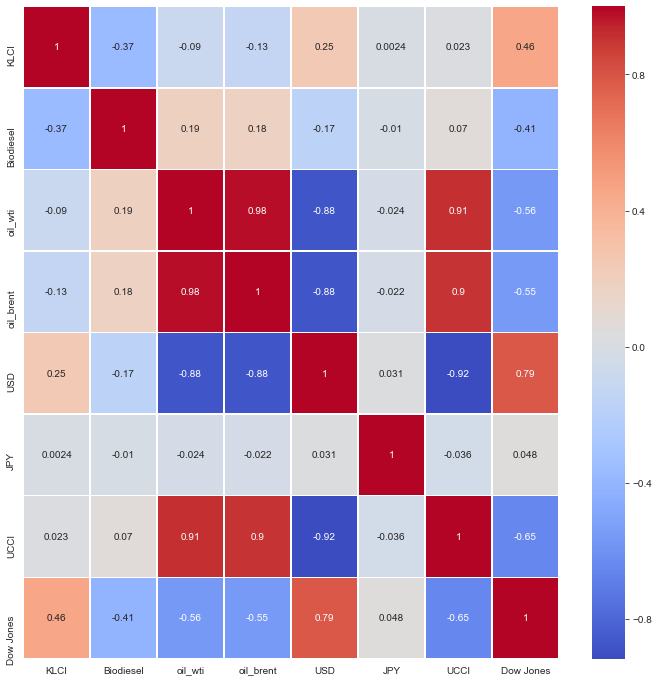

In [264]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_corr,annot=True,cmap='coolwarm',linecolor='white',linewidths=.5)